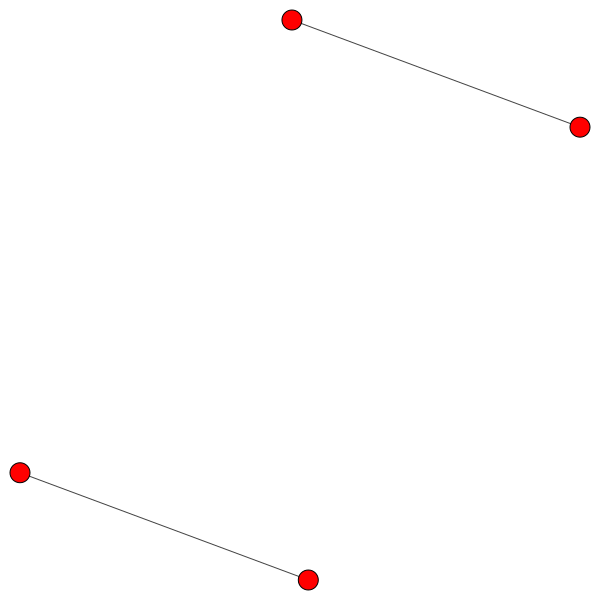

In [21]:
import igraph as ig

g = ig.Graph(edges=[[0, 1], [2, 3]])
ig.plot(g)


In [2]:
g = ig.Graph(
    6,
    [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5)]
)
results = g.get_shortest_paths(1, to=4, output="vpath")

# results = [[1, 0, 2, 4]]

In [3]:
import matplotlib.pyplot as plt

In [5]:
g.es["weight"] = [2, 1, 5, 4, 7, 3, 2]

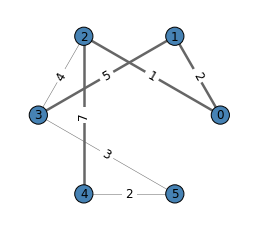

In [6]:
g.es['width'] = 0.5
g.es[results[0]]['width'] = 2.5

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout='circle',
    vertex_color='steelblue',
    vertex_label=range(g.vcount()),
    edge_width=g.es['width'],
    edge_label=g.es["weight"],
    edge_color='#666',
    edge_align_label=True,
    edge_background='white'
)
plt.show()

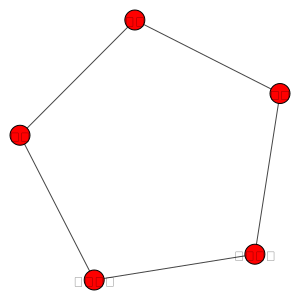

In [7]:
import igraph as ig

# 创建一个空图
island_graph = ig.Graph()

# 添加顶点
places = ["起点", "神秘洞穴", "古老神庙", "沙滩", "宝藏"]
island_graph.add_vertices(places)

# 添加边
edges = [("起点", "神秘洞穴"), ("起点", "沙滩"), ("神秘洞穴", "古老神庙"), ("古老神庙", "宝藏"), ("沙滩", "宝藏")]
island_graph.add_edges(edges)

# 可视化图
layout = island_graph.layout("kk")
ig.plot(island_graph, layout=layout, bbox=(300, 300), vertex_label=places)


In [8]:
def find_path(graph, start, end):
    return graph.get_shortest_paths(start, to=end, mode="ALL", output="vpath")[0]

path = find_path(island_graph, "起点", "宝藏")
path_places = [places[i] for i in path]
print("到宝藏的路径:", path_places)


到宝藏的路径: ['起点', '沙滩', '宝藏']


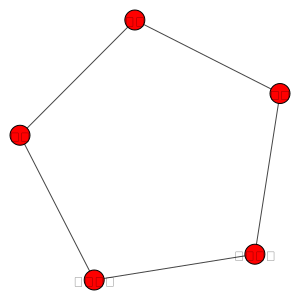

In [9]:
visual_style = {}
visual_style["vertex_label"] = places
visual_style["vertex_label_font"] = 2  # 使用 igraph 中的字体编号，或者指定字体名称
visual_style["bbox"] = (300, 300)
visual_style["layout"] = island_graph.layout("kk")

ig.plot(island_graph, **visual_style)


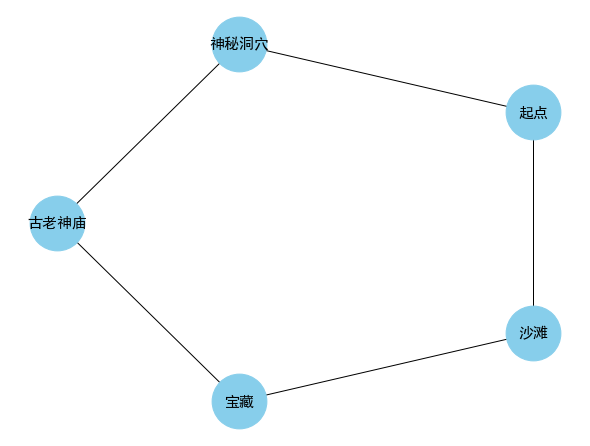

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edges)

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_family="SimHei", font_size=15)
plt.show()


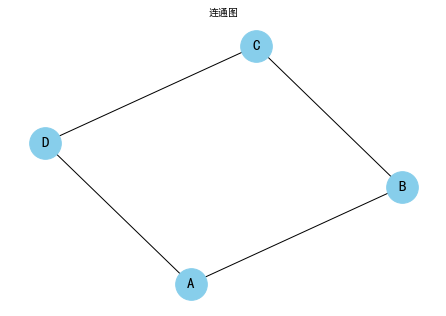

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建连通图
G_connected = nx.Graph()
edges_connected = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")]
G_connected.add_edges_from(edges_connected)

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G_connected)
nx.draw(G_connected, pos, with_labels=True, node_size=1000, node_color="skyblue", font_family="SimHei", font_size=15)
import matplotlib.font_manager as fm
my_font = fm.FontProperties(fname="C:/Windows/Fonts/simhei.ttf")
plt.title("连通图", fontproperties=my_font)
plt.show()


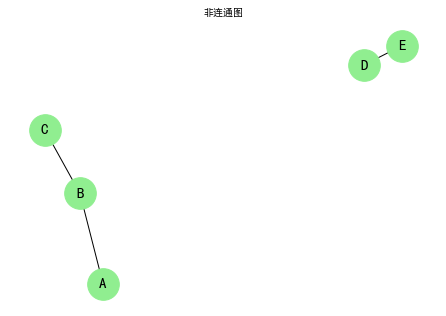

In [13]:
# 创建非连通图
G_disconnected = nx.Graph()
edges_disconnected = [("A", "B"), ("B", "C"), ("D", "E")]
G_disconnected.add_edges_from(edges_disconnected)

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G_disconnected)
nx.draw(G_disconnected, pos, with_labels=True, node_size=1000, node_color="lightgreen", font_family="SimHei", font_size=15)
plt.title("非连通图")
# 设置中文字体
import matplotlib.font_manager as fm
my_font = fm.FontProperties(fname="C:/Windows/Fonts/simhei.ttf")
plt.title("非连通图", fontproperties=my_font)
plt.show()


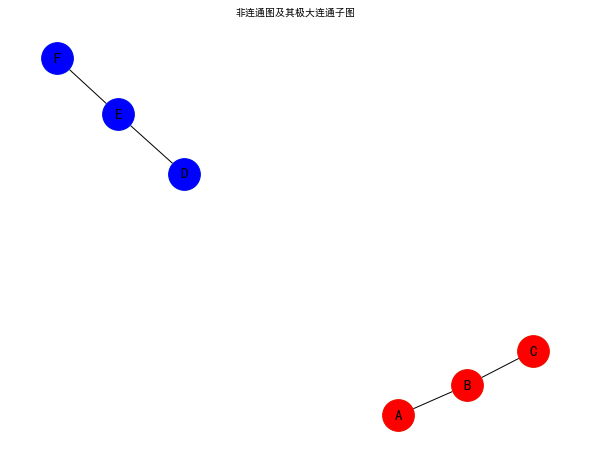

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个非连通图
G = nx.Graph()
edges = [("A", "B"), ("B", "C"), ("D", "E"), ("E", "F")]
G.add_edges_from(edges)

# 找到极大连通子图
connected_components = list(nx.connected_components(G))

# 可视化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightgreen", font_family="SimHei", font_size=15)
plt.title("非连通图及其极大连通子图",fontproperties=my_font)

# 使用不同的颜色高亮显示每个极大连通子图
colors = ["red", "blue", "yellow"]
for idx, component in enumerate(connected_components):
    nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=colors[idx % len(colors)], node_size=1000)

plt.show()


In [20]:
import igraph as ig

# 创建一个非连通图
g = ig.Graph()
g.add_vertices(["A", "B", "C", "D", "E", "F"])
g.add_edges([("A", "B"), ("B", "C"), ("D", "E"), ("E", "F")])

# 找到极大连通子图
subgraphs = g.decompose()

# 可视化
layout = g.layout("kk")
visual_style = {}
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_label_font"] = 2  # 使用 igraph 中的字体编号，或者指定字体名称
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 20

for subgraph in subgraphs:
    ig.plot(subgraph, **visual_style)


# GNN play

In [23]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# 定义GNN模型
class GNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# 假设我们有以下数据
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float)  # 节点特征
edge_index = torch.tensor([[0, 1, 2, 3], [1, 0, 3, 2]], dtype=torch.long)  # 边

data = Data(x=x, edge_index=edge_index)

# 训练模型
model = GNN(num_features=1, hidden_channels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.mse_loss(out, torch.tensor([[2], [1], [4], [3]], dtype=torch.float))
    loss.backward()
    optimizer.step()

# 使用模型进行推荐
model.eval()
with torch.no_grad():
    embeddings = model(data.x, data.edge_index)

# 基于嵌入的相似性进行推荐
def recommend(student_embedding, embeddings):
    similarities = torch.nn.functional.cosine_similarity(student_embedding, embeddings, dim=1)
    recommended_indices = torch.argsort(similarities, descending=True)
    return recommended_indices

student_idx = 0
recommendations = recommend(embeddings[student_idx], embeddings)
print("推荐的活动和信息:", recommendations)


C:\Users\86171\AppData\Local\Temp\ipykernel_19552\123694731.py:34: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, torch.tensor([[2], [1], [4], [3]], dtype=torch.float))


推荐的活动和信息: tensor([0, 1, 2, 3])


In [24]:
import numpy as np

# Define the nodes and edges based on the description
nodes = ["图书馆", "计算机系大楼", "食堂", "学生宿舍", "体育馆"]
edges = [
    ("图书馆", "计算机系大楼"),
    ("计算机系大楼", "食堂"),
    ("食堂", "学生宿舍"),
    ("学生宿舍", "体育馆"),
    ("图书馆", "食堂")
]

# Create an adjacency matrix
adjacency_matrix = np.zeros((len(nodes), len(nodes)))

for edge in edges:
    i, j = nodes.index(edge[0]), nodes.index(edge[1])
    adjacency_matrix[i][j] = 1
    adjacency_matrix[j][i] = 1  # since it's an undirected graph

adjacency_matrix


array([[0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.]])